# Insurance Project 2024 #

### Problem Statement: Predicting the likelihood of claims  

As a strategy, being able to accurately predict the likelihood of claims is the bases of ensuring continuous business flow while ensuring customer satisafaction. In this project we will aim to develop a predictive model to effectivley forecast the probability of future claims. We are presented with data relating to vehicle insurance and will be working onit accordingly. In predicting future claims we will also look at risk assessment.  

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>


 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |

---

In [1]:
import pandas as pd # For data manipulation and analysis
import numpy as np  # For numerical operations
import re
import matplotlib.pyplot as plt # For data visualization
%matplotlib inline
import seaborn as sns # For statistical data visualization
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from shapely.geometry import Point
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import geopandas as gpd
import cartopy.crs as ccrs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings("ignore")

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |


---

In [2]:
insurance_df = pd.read_csv('insurance_claims.csv')

In [3]:
insurance_df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,NaN
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,NaN
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,NaN
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,NaN
5,256,39.0,104594,2006-10-12,OH,250/500,1000.0,1351.10,0,478456,...,NO,64100.0,6410.0,6410.0,51280,Saab,95,2003,Y,NaN
6,137,34.0,413978,2000-06-04,IN,250/500,1000.0,1333.35,0,441716,...,?,78650.0,21450.0,7150.0,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37.0,429027,1990-02-03,IL,100/300,1000.0,1137.03,0,603195,...,YES,51590.0,9380.0,9380.0,32830,Audi,A5,2015,N,NaN
8,27,33.0,485665,1997-02-05,IL,100/300,500.0,1442.99,0,601734,...,YES,27700.0,2770.0,2770.0,22160,Toyota,Camry,2012,N,NaN
9,212,42.0,636550,2011-07-25,IL,100/300,500.0,1315.68,0,600983,...,?,42300.0,4700.0,4700.0,32900,Saab,92x,1996,N,NaN


In [4]:
insurance_df.shape

(1000, 40)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |


---


### 3.1) Non - Graphical Exploratory Data Analysis

### 3.1.1) Univariate Analysis ###

In [5]:
insurance_df.isna().sum()

months_as_customer                0
age                               2
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 2
policy_annual_premium             3
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           1
insured_occupation                0
insured_hobbies                   2
insured_relationship              0
capital-gains                     2
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             2
incident_state                    2
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We have a total of 1000 rows and 40 columns, firsly looking at the percentage of missing data.
We firstly see that the column _c39 has no data at all, therefore this column will be dropped first before removing any other missing data.  
The percentage of missing data is low therefore we can treat the missing data by imputing the mean, mode or other statistical varaibles. 


In [6]:
insurance_df = insurance_df.drop('_c39', axis=1)

In [7]:
missing_df = (979/1000) * 100
print(missing_df)

97.89999999999999


There is 3% missing data

In [8]:
insurance_df['age']=insurance_df['age'].fillna(insurance_df['age'].mean())
insurance_df['policy_annual_premium']=insurance_df['policy_annual_premium'].fillna(insurance_df['policy_annual_premium'].mean())
insurance_df['capital-gains']=insurance_df['capital-gains'].fillna(insurance_df['capital-gains'].mean())
insurance_df['total_claim_amount']=insurance_df['total_claim_amount'].fillna(insurance_df['total_claim_amount'].mean())
insurance_df['injury_claim']=insurance_df['injury_claim'].fillna(insurance_df['injury_claim'].mean())
insurance_df['property_claim']=insurance_df['property_claim'].fillna(insurance_df['property_claim'].mean())

insurance_df['policy_deductable']=insurance_df['policy_deductable'].fillna(insurance_df['policy_deductable'].mode()[0])
insurance_df['insured_education_level']=insurance_df['insured_education_level'].fillna(insurance_df['insured_education_level'].mode()[0])
insurance_df['insured_hobbies']=insurance_df['insured_hobbies'].fillna(insurance_df['insured_hobbies'].mode()[0])
insurance_df['authorities_contacted']=insurance_df['authorities_contacted'].fillna(insurance_df['authorities_contacted'].mode()[0])
insurance_df['incident_state']=insurance_df['incident_state'].fillna(insurance_df['incident_state'].mode()[0])


In [9]:
insurance_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,2,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,0,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,3,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,2,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,1,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N


In [10]:
insurance_df.shape

(1000, 39)

In [11]:
insurance_df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.962926,546238.648000,1134.000000,1257.001113,1.101000e+06,501214.488000,25176.452906,-26793.700000,11.644000,1.83900,0.992000,1.487000,52767.469880,7434.944945,7398.628629,37928.950000,2005.103000
std,115.113174,9.126276,257063.005276,610.669237,243.898011,2.297407e+06,71701.610941,27849.459762,28104.096686,6.951373,1.01888,0.820127,1.111335,26352.431456,4880.713630,4824.634340,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1090.567500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41962.500000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,57880.000000,6780.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70532.500000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


In [12]:
insurance_df.skew()

months_as_customer             0.362177
age                            0.481632
policy_number                  0.038991
policy_deductable              0.484841
policy_annual_premium         -0.000740
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.476062
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.593974
injury_claim                   0.263941
property_claim                 0.378769
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [13]:
insurance_df.kurtosis()

months_as_customer            -0.485428
age                           -0.255907
policy_number                 -1.132638
policy_deductable             -1.365879
policy_annual_premium          0.085220
umbrella_limit                 1.792077
insured_zip                   -1.190711
capital-gains                 -1.275853
capital-loss                  -1.313875
incident_hour_of_the_day      -1.192940
number_of_vehicles_involved   -1.500467
bodily_injuries               -1.513178
witnesses                     -1.343629
total_claim_amount            -0.443382
injury_claim                  -0.762990
property_claim                -0.375891
vehicle_claim                 -0.446573
auto_year                     -1.171868
dtype: float64

In [14]:
insurance_df.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
months_as_customer,328,228,134,256,228,256,137,165,27,212,...,286,257,94,124,141,3,285,130,458,456
age,48.0,42.0,29.0,41.0,44.0,39.0,34.0,37.0,33.0,42.0,...,43.0,44.0,26.0,28.0,30.0,38.0,41.0,34.0,62.0,60.0
policy_number,521585,342868,687698,227811,367455,104594,413978,429027,485665,636550,...,663190,109392,215278,674570,681486,941851,186934,918516,533940,556080
policy_bind_date,2014-10-17,2006-06-27,2000-09-06,1990-05-25,2014-06-06,2006-10-12,2000-06-04,1990-02-03,1997-02-05,2011-07-25,...,1994-02-05,2006-07-12,2007-10-24,2001-12-08,2007-03-24,1991-07-16,2014-01-05,2003-02-17,2011-11-18,1996-11-11
policy_state,OH,IN,OH,IL,IL,OH,IN,IL,IL,IL,...,IL,OH,IN,OH,IN,OH,IL,OH,IL,OH
policy_csl,250/500,250/500,100/300,250/500,500/1000,250/500,250/500,100/300,100/300,100/300,...,100/300,100/300,100/300,250/500,500/1000,500/1000,100/300,250/500,500/1000,250/500
policy_deductable,1000.0,2000.0,2000.0,2000.0,1000.0,1000.0,1000.0,1000.0,500.0,500.0,...,500.0,1000.0,500.0,1000.0,1000.0,1000.0,1000.0,500.0,2000.0,1000.0
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91,1351.1,1333.35,1137.03,1442.99,1315.68,...,1564.43,1280.88,722.66,1235.14,1347.04,1310.8,1436.79,1383.49,1356.92,766.19
umbrella_limit,0,5000000,5000000,6000000,6000000,0,0,0,0,0,...,3000000,0,0,0,0,0,0,3000000,5000000,0
insured_zip,466132,468176,430632,608117,610706,478456,441716,603195,601734,600983,...,477644,433981,433696,443567,430665,431289,608177,442797,441714,612260


In [15]:
insurance_df.duplicated().sum()

0

In [16]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   float64
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   float64
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Lets have a look at the data we will be working with and a few others to gain better understanding. We will plot same and simply print out the information for the rest. 

In [17]:
insurance_df['insured_education_level'].value_counts()

JD             162
High School    160
Associate      145
MD             144
Masters        143
PhD            124
College        122
Name: insured_education_level, dtype: int64

In [18]:
insurance_df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

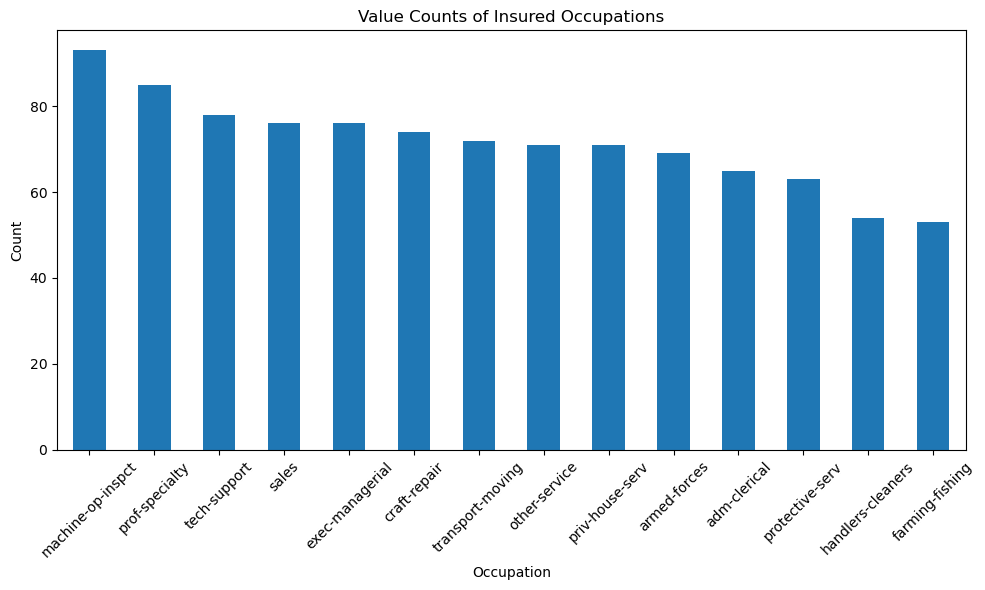

In [19]:
import matplotlib.pyplot as plt

# Assuming insurance_df is your DataFrame
value_counts = insurance_df['insured_occupation'].value_counts()

# Plotting the value counts
plt.figure(figsize=(10, 6))  # Optional: adjust figure size
value_counts.plot(kind='bar')
plt.title('Value Counts of Insured Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Optional: rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [20]:
insurance_df['auto_make'].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [21]:
insurance_df['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

In [22]:
insurance_df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

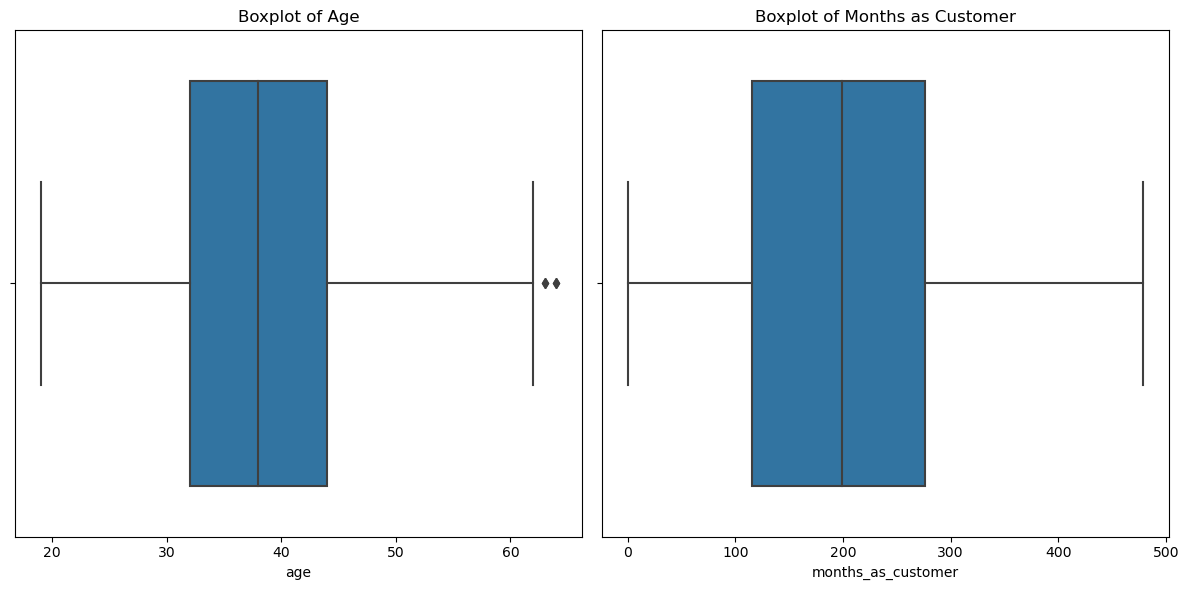

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming insurance_df is your DataFrame
plt.figure(figsize=(12, 6))

# Boxplot for Age
plt.subplot(1, 2, 1)  # Subplot 1
sns.boxplot(x=insurance_df['age'])
plt.title('Boxplot of Age')

# Boxplot for Months as Customer
plt.subplot(1, 2, 2)  # Subplot 2
sns.boxplot(x=insurance_df['months_as_customer'])
plt.title('Boxplot of Months as Customer')


plt.tight_layout()
plt.show()

We see that there are more females insured over males, we can compare the severe incident to gender as well as the car type. Or look at the age of the vehicle and the level of severity of the accident 

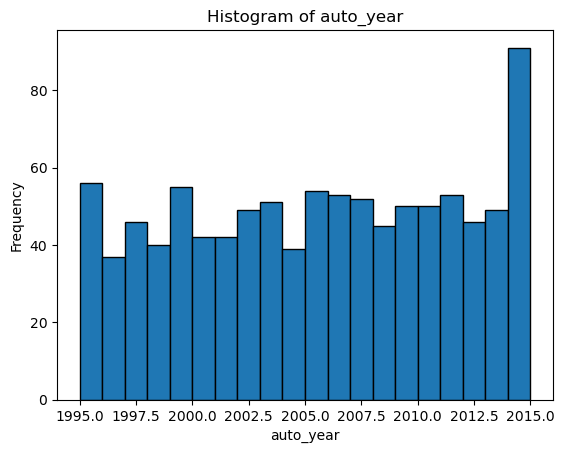

In [24]:
# Choose the column for the histogram
column_name = 'auto_year'

# Plot the histogram
plt.hist(insurance_df[column_name], bins=20, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

Looking at the above histogram we can see that the distribution of the make_year is central. Older models have different risk factors compared to newer models 

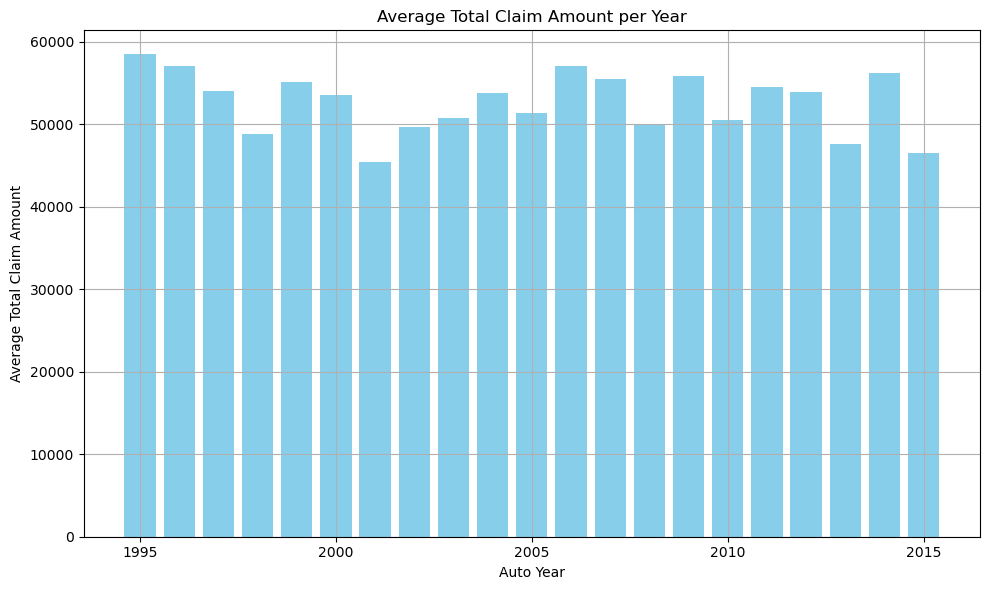

In [25]:
average_claims_per_year = insurance_df.groupby('auto_year')['total_claim_amount'].mean()

# Convert index (auto_year) to a column
average_claims_per_year = average_claims_per_year.reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(average_claims_per_year['auto_year'], average_claims_per_year['total_claim_amount'], color='skyblue')
plt.xlabel('Auto Year')
plt.ylabel('Average Total Claim Amount')
plt.title('Average Total Claim Amount per Year')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [26]:
average_claim_amount = insurance_df['total_claim_amount'].mean()

print(f'Average Claim Amount per Incident: ${average_claim_amount:.2f}')

Average Claim Amount per Incident: $52767.47


In [27]:
insurance_df['collision_type'] = insurance_df['collision_type'].replace('?', 'unknown')

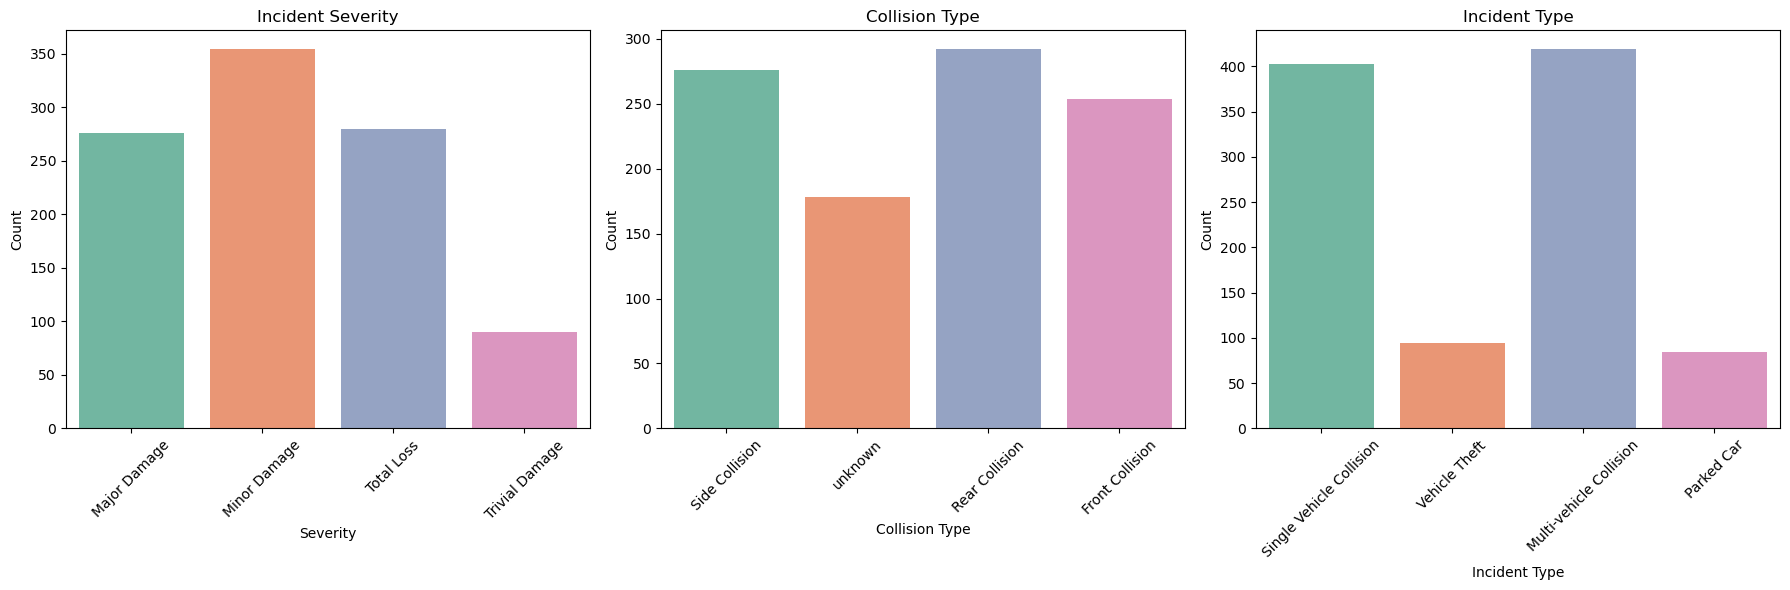

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming insurance_df is your DataFrame

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot for incident_severity
sns.countplot(x='incident_severity', data=insurance_df, ax=axes[0], palette='Set2')
axes[0].set_title('Incident Severity')
axes[0].set_xlabel('Severity')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot for collision_type
sns.countplot(x='collision_type', data=insurance_df, ax=axes[1], palette='Set2')
axes[1].set_title('Collision Type')
axes[1].set_xlabel('Collision Type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Plot for incident_type
sns.countplot(x='incident_type', data=insurance_df, ax=axes[2], palette='Set2')
axes[2].set_title('Incident Type')
axes[2].set_xlabel('Incident Type')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

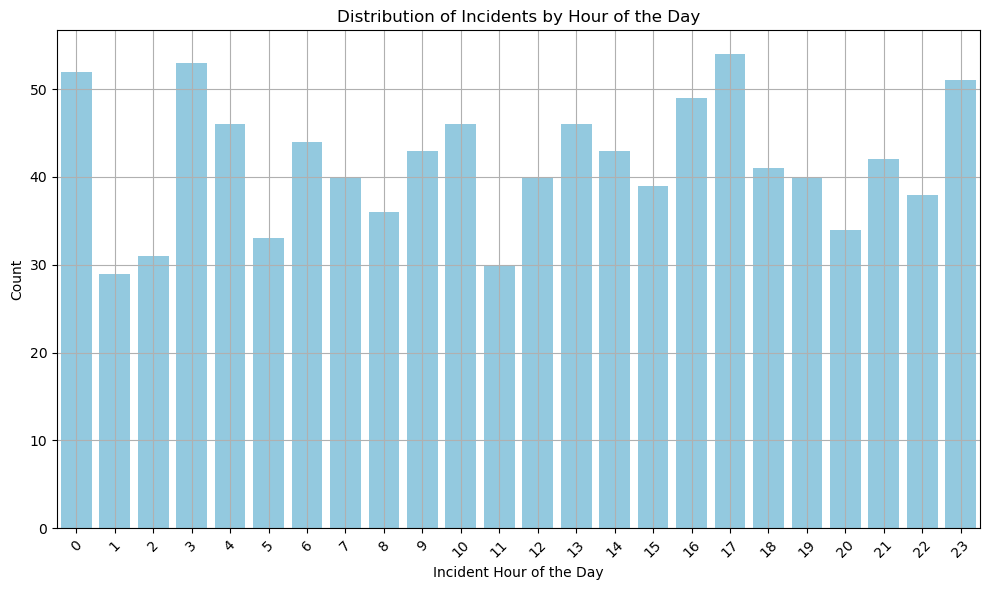

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming insurance_df is your DataFrame
plt.figure(figsize=(10, 6))

# Count plot of incident_hour_of_the_day
sns.countplot(x='incident_hour_of_the_day', data=insurance_df, color='skyblue')

# Adding labels and title
plt.xlabel('Incident Hour of the Day')
plt.ylabel('Count')
plt.title('Distribution of Incidents by Hour of the Day')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

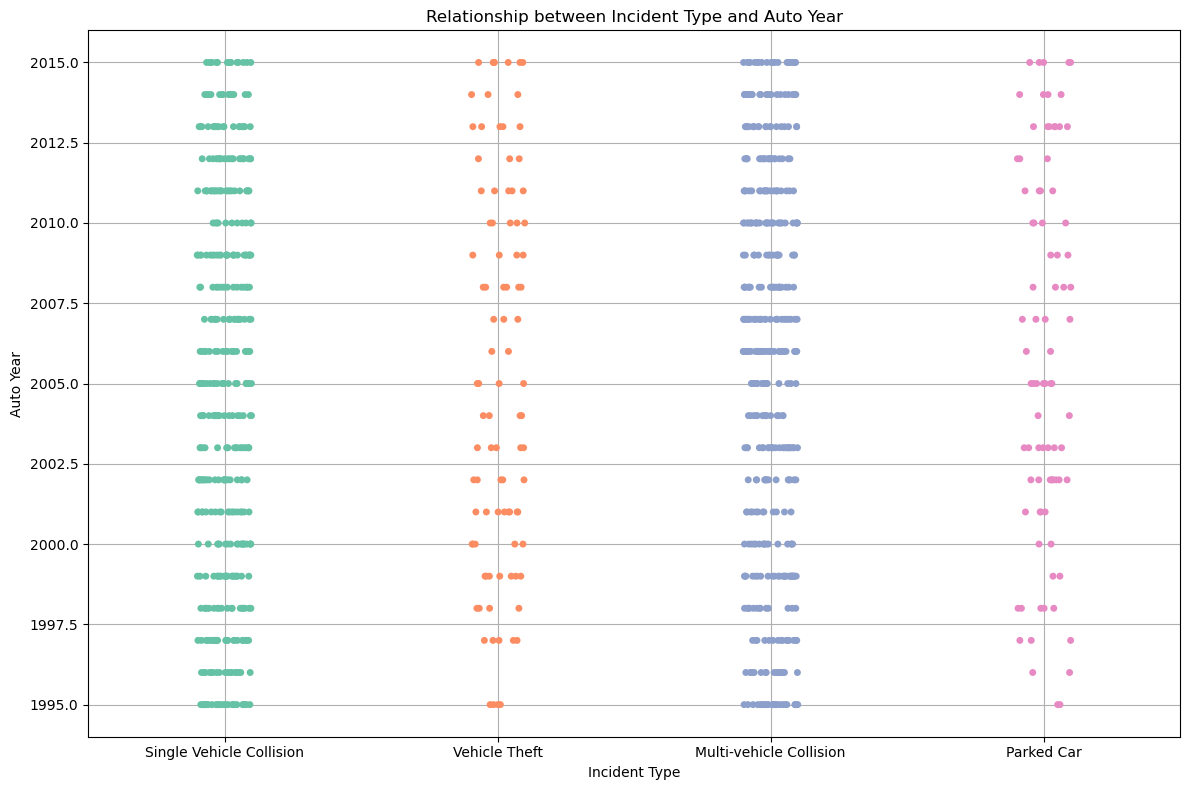

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming insurance_df is your DataFrame
plt.figure(figsize=(12, 8))

# Categorical plot (strip plot) of incident_type vs auto_year
sns.stripplot(x='incident_type', y='auto_year', data=insurance_df, jitter=True, palette='Set2')

# Adding labels and title
plt.xlabel('Incident Type')
plt.ylabel('Auto Year')
plt.title('Relationship between Incident Type and Auto Year')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


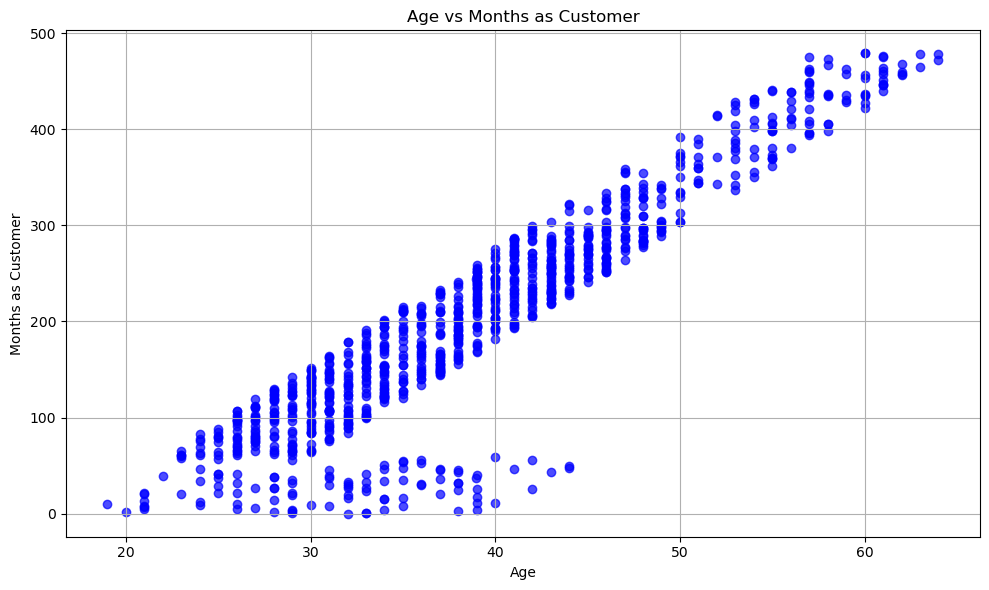

In [31]:
import matplotlib.pyplot as plt

# Assuming insurance_df is your DataFrame
plt.figure(figsize=(10, 6))

# Scatter plot of Age vs Months as Customer
plt.scatter(insurance_df['age'], insurance_df['months_as_customer'], alpha=0.7, color='b')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Months as Customer')
plt.title('Age vs Months as Customer')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

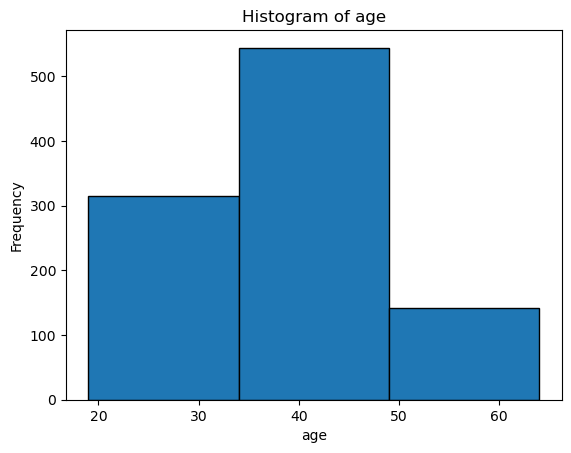

In [32]:
# Choose the column for the histogram
column_name = 'age'

# Plot the histogram
plt.hist(insurance_df[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

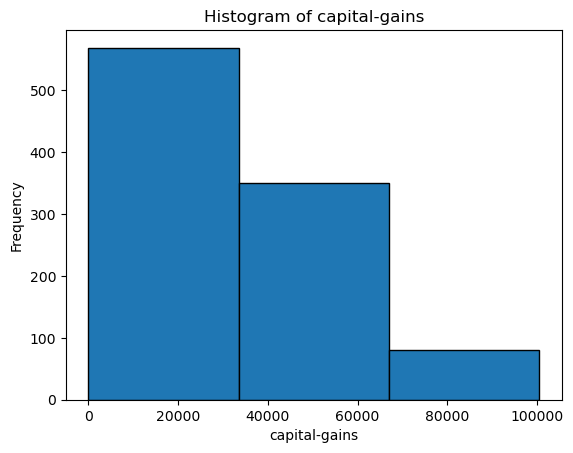

In [33]:
# Choose the column for the histogram
column_name = 'capital-gains'

# Plot the histogram
plt.hist(insurance_df[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

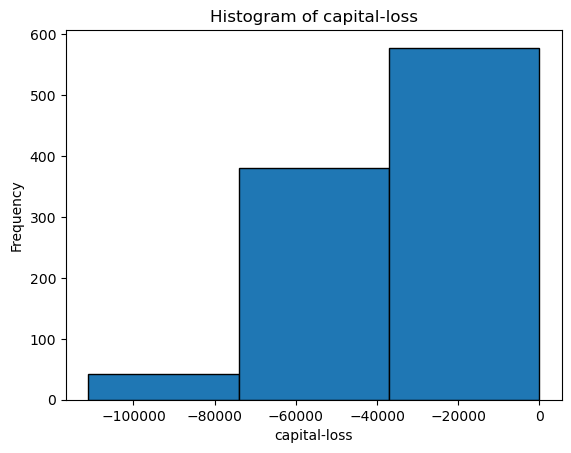

In [34]:
# Choose the column for the histogram
column_name = 'capital-loss'

# Plot the histogram
plt.hist(insurance_df[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |


---


In [35]:
insurance_df["Premium to Deductible"] = insurance_df['policy_annual_premium']/insurance_df['policy_deductable']

In [36]:
bin_edges = [0, 30, 55, 100]  # Define the bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

# Create a new column based on the bin labels
insurance_df['ages_category'] = pd.cut(insurance_df['age'], bins=bin_edges, labels=bin_labels)

In [37]:
insurance_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Premium to Deductible,ages_category
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,1.40691,Middle Aged
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,0.59861,Middle Aged
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,0.70657,Young Adult
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,0.70787,Middle Aged
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,1.58391,Middle Aged


In [38]:
bin_edges = [0, 1000, 1500, 3000]
bin_labels = ['Low', 'Average', 'High']

insurance_df['policy_annual_premium'] = pd.cut(insurance_df['policy_annual_premium'], bins=bin_edges, labels=bin_labels)

In [39]:
insurance_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Premium to Deductible,ages_category
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,Average,0,466132,...,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,1.40691,Middle Aged
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,Average,5000000,468176,...,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,0.59861,Middle Aged
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,Average,5000000,430632,...,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,0.70657,Young Adult
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,Average,6000000,608117,...,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,0.70787,Middle Aged
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,High,6000000,610706,...,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,1.58391,Middle Aged


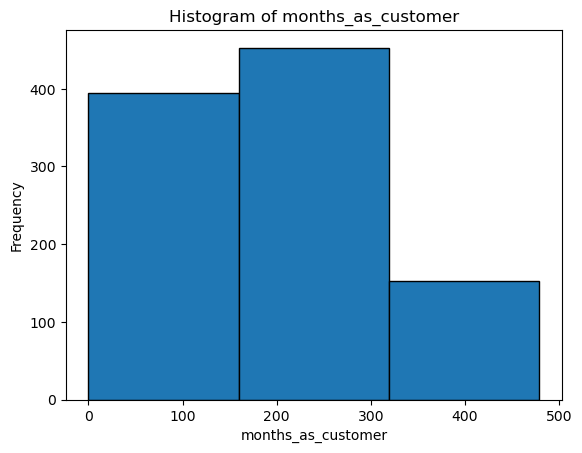

In [40]:
# Choose the column for the histogram
column_name = 'months_as_customer'

# Plot the histogram
plt.hist(insurance_df[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

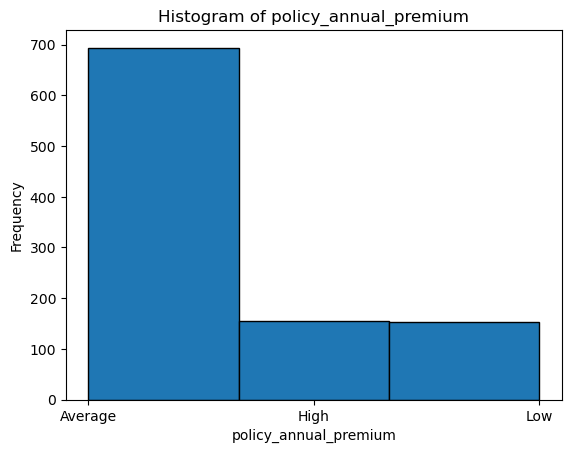

In [41]:
# Choose the column for the histogram
column_name = 'policy_annual_premium'

# Plot the histogram
plt.hist(insurance_df[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

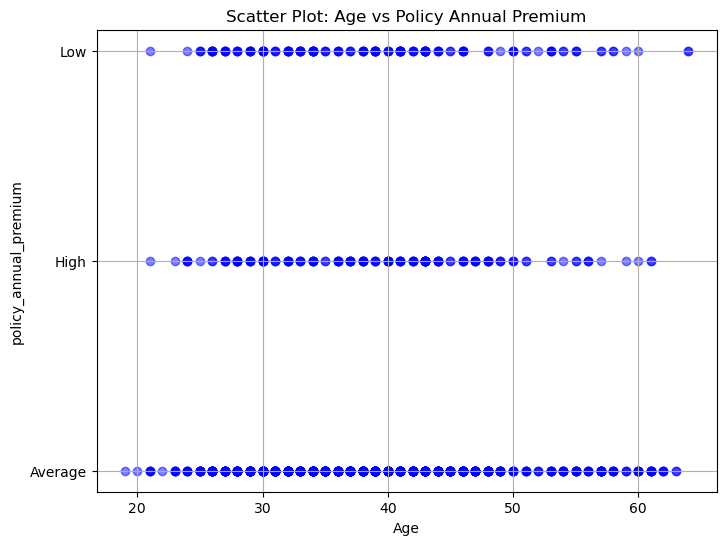

In [42]:
x = insurance_df['age']
y = insurance_df['policy_annual_premium']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('policy_annual_premium')
plt.title('Scatter Plot: Age vs Policy Annual Premium')
plt.grid(True)
plt.show()

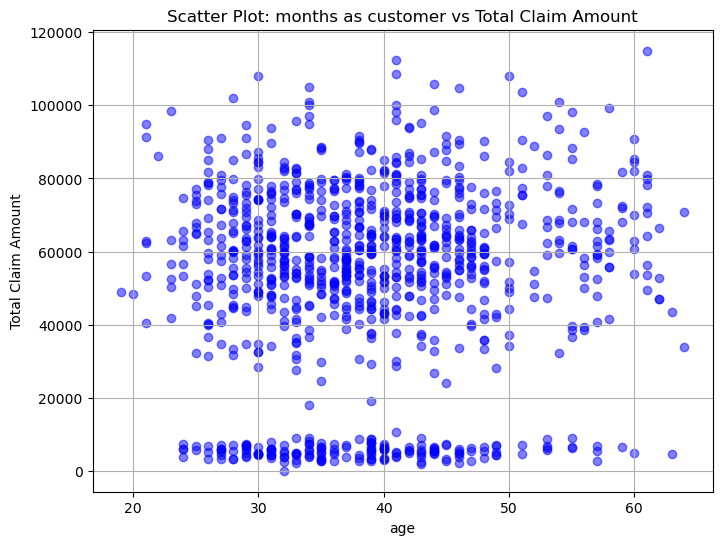

In [43]:
x = insurance_df['age']
y = insurance_df['total_claim_amount']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.xlabel('age')
plt.ylabel('Total Claim Amount')
plt.title('Scatter Plot: months as customer vs Total Claim Amount')
plt.grid(True)
plt.show()

Mean Injury Claim: $7434.94
Median Injury Claim: $6780.00
Max Injury Claim: $21450.00
Min Injury Claim: $0.00


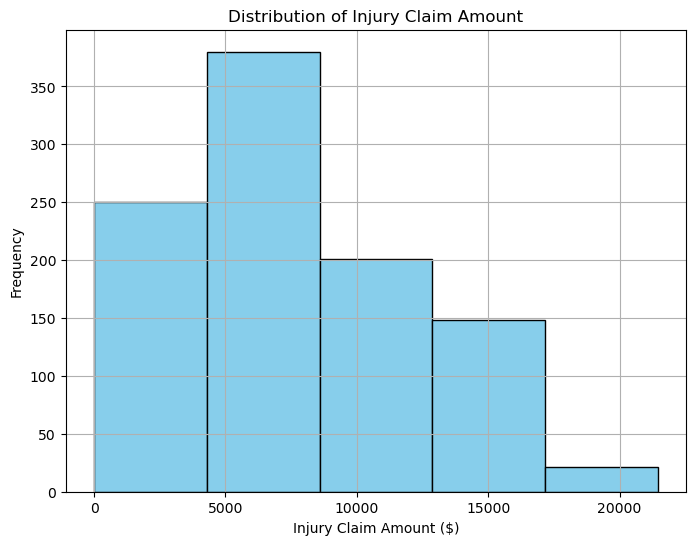

In [44]:
mean_injury_claim = insurance_df['injury_claim'].mean()
median_injury_claim = insurance_df['injury_claim'].median()
max_injury_claim = insurance_df['injury_claim'].max()
min_injury_claim = insurance_df['injury_claim'].min()

# Print the computed statistics
print(f'Mean Injury Claim: ${mean_injury_claim:.2f}')
print(f'Median Injury Claim: ${median_injury_claim:.2f}')
print(f'Max Injury Claim: ${max_injury_claim:.2f}')
print(f'Min Injury Claim: ${min_injury_claim:.2f}')

# Plotting a histogram for visualization (optional)
plt.figure(figsize=(8, 6))
plt.hist(insurance_df['injury_claim'], bins=5, edgecolor='black', color='skyblue')
plt.xlabel('Injury Claim Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Injury Claim Amount')
plt.grid(True)

Mean Property Claim: $7398.63
Median Property Claim: $6750.00
Max Property Claim: $23670.00
Min Property Claim: $0.00


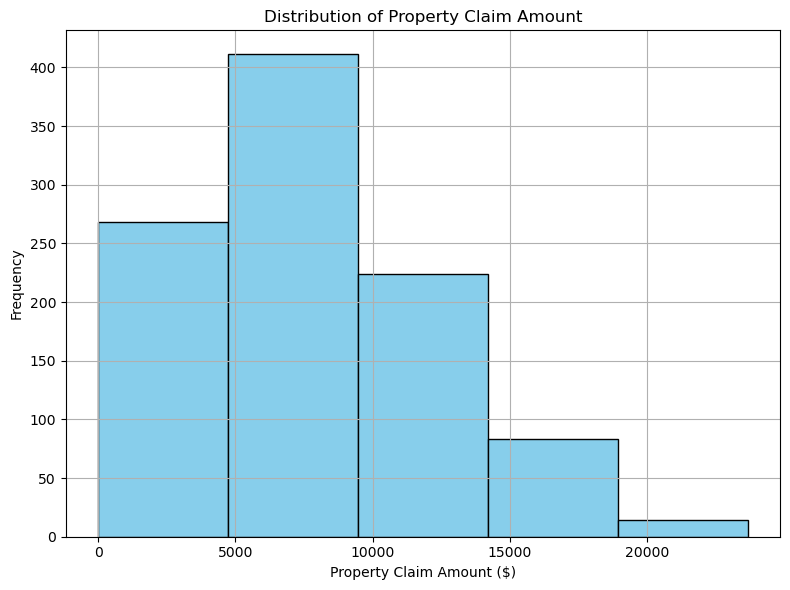

In [45]:
mean_property_claim = insurance_df['property_claim'].mean()
median_property_claim = insurance_df['property_claim'].median()
max_property_claim = insurance_df['property_claim'].max()
min_property_claim = insurance_df['property_claim'].min()

# Print the computed statistics
print(f'Mean Property Claim: ${mean_property_claim:.2f}')
print(f'Median Property Claim: ${median_property_claim:.2f}')
print(f'Max Property Claim: ${max_property_claim:.2f}')
print(f'Min Property Claim: ${min_property_claim:.2f}')

# Plotting a histogram for visualization (optional)
plt.figure(figsize=(8, 6))
plt.hist(insurance_df['property_claim'], bins=5, edgecolor='black', color='skyblue')
plt.xlabel('Property Claim Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Property Claim Amount')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

Mean Vehicle Claim: $37928.95
Median Vehicle Claim: $42100.00
Max Vehicle Claim: $79560.00
Min Vehicle Claim: $70.00


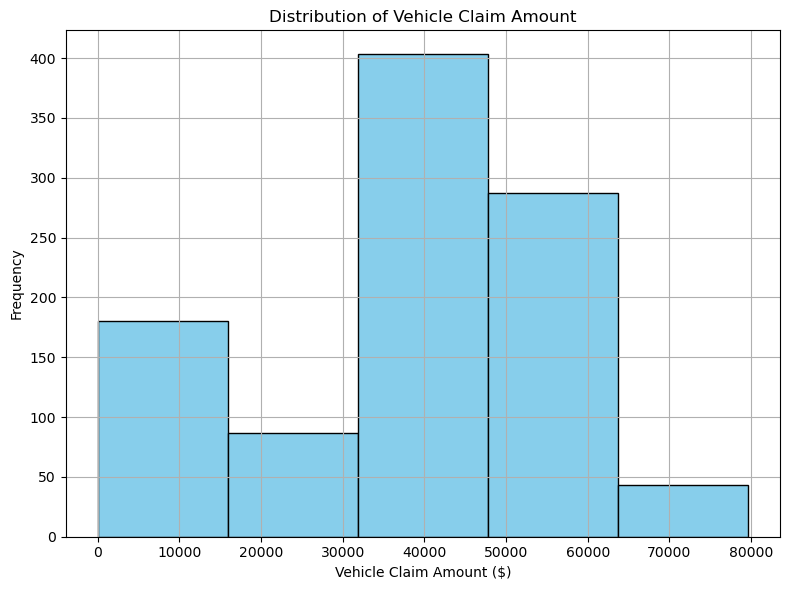

In [46]:
mean_vehicle_claim = insurance_df['vehicle_claim'].mean()
median_vehicle_claim = insurance_df['vehicle_claim'].median()
max_vehicle_claim = insurance_df['vehicle_claim'].max()
min_vehicle_claim = insurance_df['vehicle_claim'].min()

# Print the computed statistics
print(f'Mean Vehicle Claim: ${mean_vehicle_claim:.2f}')
print(f'Median Vehicle Claim: ${median_vehicle_claim:.2f}')
print(f'Max Vehicle Claim: ${max_vehicle_claim:.2f}')
print(f'Min Vehicle Claim: ${min_vehicle_claim:.2f}')

# Plotting a histogram for visualization (optional)
plt.figure(figsize=(8, 6))
plt.hist(insurance_df['vehicle_claim'], bins=5, edgecolor='black', color='skyblue')
plt.xlabel('Vehicle Claim Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Vehicle Claim Amount')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [47]:
mean_vehicle_claim = insurance_df['vehicle_claim'].mean()

# Filter rows where vehicle_claim is above the mean
above_mean_claims = insurance_df[insurance_df['vehicle_claim'] > mean_vehicle_claim]

# Count the number of claims above the mean
count_above_mean = above_mean_claims.shape[0]

print(f'Count of Vehicle Claims Above Mean: {count_above_mean}')

Count of Vehicle Claims Above Mean: 608


There are 608 policy holders who have made claims that are above the mean policy calim. This seems concerning, it aligns with the capital gains and losses observed. The insurer might consider adjusting it's premiums 

In [50]:
from sklearn.preprocessing import LabelEncoder

# Example DataFrame df with categorical variables
# df = ...

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode insured_education_level
insurance_df['insured_education_level_encoded'] = label_encoder.fit_transform(insurance_df['insured_education_level'])

# Encode insured_occupation
insurance_df['insured_occupation_encoded'] = label_encoder.fit_transform(insurance_df['insured_occupation'])

# Encode auto_make
insurance_df['auto_make_encoded'] = label_encoder.fit_transform(insurance_df['auto_make'])

# Encode auto_model
insurance_df['auto_model_encoded'] = label_encoder.fit_transform(insurance_df['auto_model'])

insurance_df['incident_type'] = label_encoder.fit_transform(insurance_df['incident_type'])

insurance_df['incident_severity'] = label_encoder.fit_transform(insurance_df['incident_severity'])

# Example of accessing encoded values:
# df['insured_education_level_encoded']


In [51]:
insurance_df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_make,auto_model,auto_year,fraud_reported,Premium to Deductible,ages_category,insured_education_level_encoded,insured_occupation_encoded,auto_make_encoded,auto_model_encoded
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,Average,0,466132,...,Saab,92x,2004,Y,1.40691,Middle Aged,4,2,10,1
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,Average,5000000,468176,...,Mercedes,E400,2007,Y,0.59861,Middle Aged,4,6,8,12
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,Average,5000000,430632,...,Dodge,RAM,2007,N,0.70657,Young Adult,6,11,4,30
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,Average,6000000,608117,...,Chevrolet,Tahoe,2014,Y,0.70787,Middle Aged,6,1,3,34
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,High,6000000,610706,...,Accura,RSX,2009,N,1.58391,Middle Aged,0,11,0,31
5,256,39.0,104594,2006-10-12,OH,250/500,1000.0,Average,0,478456,...,Saab,95,2003,Y,1.35110,Middle Aged,6,12,10,3
6,137,34.0,413978,2000-06-04,IN,250/500,1000.0,Average,0,441716,...,Nissan,Pathfinder,2012,N,1.33335,Middle Aged,3,9,9,29
7,165,37.0,429027,1990-02-03,IL,100/300,1000.0,Average,0,603195,...,Audi,A5,2015,N,1.13703,Middle Aged,0,12,1,5
8,27,33.0,485665,1997-02-05,IL,100/300,500.0,Average,0,601734,...,Toyota,Camry,2012,N,2.88598,Middle Aged,6,7,12,9
9,212,42.0,636550,2011-07-25,IL,100/300,500.0,Average,0,600983,...,Saab,92x,1996,N,2.63136,Middle Aged,6,8,10,1


## Feature Engineering ##

In [52]:
bin_edges_customer = [0, 25, 150, 500]  # Define the bin edges
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  # Corresponding labels for each bin

# Create a new column based on the bin labels
insurance_df['customer_category'] = pd.cut(insurance_df['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :-------------------------|

---

## Poisson Regression Model ##

In [53]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the numerical variable 'age'
insurance_df['age_scaled'] = scaler.fit_transform(insurance_df[['age']])

In [54]:
import statsmodels.api as sm

# Assuming 'df' is your pandas DataFrame containing the relevant columns
X = insurance_df[['incident_type', 'incident_severity', 'incident_hour_of_the_day']]
y = insurance_df['number_of_vehicles_involved']

# Add an intercept term to the model
X = sm.add_constant(X)

# Fit Poisson regression model
poisson_model = sm.Poisson(y, X).fit()

# Print model summary
print(poisson_model.summary())

Optimization terminated successfully.
         Current function value: 1.241843
         Iterations 5
                               Poisson Regression Results                              
Dep. Variable:     number_of_vehicles_involved   No. Observations:                 1000
Model:                                 Poisson   Df Residuals:                      996
Method:                                    MLE   Df Model:                            3
Date:                         Wed, 19 Jun 2024   Pseudo R-squ.:                  0.1606
Time:                                 17:06:10   Log-Likelihood:                -1241.8
converged:                                True   LL-Null:                       -1479.4
Covariance Type:                     nonrobust   LLR p-value:                1.173e-102
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const   

In [55]:
y_pred = poisson_model.predict(X)

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [58]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(poisson_model.summary())
print(f"RMSE: {rmse}")

                               Poisson Regression Results                              
Dep. Variable:     number_of_vehicles_involved   No. Observations:                 1000
Model:                                 Poisson   Df Residuals:                      996
Method:                                    MLE   Df Model:                            3
Date:                         Wed, 19 Jun 2024   Pseudo R-squ.:                  0.1606
Time:                                 17:06:17   Log-Likelihood:                -1241.8
converged:                                True   LL-Null:                       -1479.4
Covariance Type:                     nonrobust   LLR p-value:                1.173e-102
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.0792      0.057     18.811      0.000       0.967       1.192
incident_type    

In [59]:
y_pred.head()

0    1.080824
1    0.639362
2    2.881091
3    1.080824
4    0.643135
dtype: float64

## Logistic Regression For Insurance Underwriting  ##

In [60]:
import pandas as pd

# Assuming your existing dataframe is named 'df'
# Selecting relevant columns for underwriting model
underwriting_df = insurance_df[[
    'months_as_customer',
    'age',
    'policy_deductable',
    'policy_annual_premium',
    'insured_sex',
    'insured_education_level',
    'insured_occupation',
    'incident_type',
    'collision_type',
    'incident_severity',
    'vehicle_claim',
]]

# Optionally, you may convert columns like 'policy_bind_date' and 'incident_date' to datetime format if needed
# underwriting_df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
# underwriting_df['incident_date'] = pd.to_datetime(df['incident_date'])

# Display the first few rows of the new dataframe
print(underwriting_df.head())


   months_as_customer   age  policy_deductable policy_annual_premium  \
0                 328  48.0             1000.0               Average   
1                 228  42.0             2000.0               Average   
2                 134  29.0             2000.0               Average   
3                 256  41.0             2000.0               Average   
4                 228  44.0             1000.0                  High   

  insured_sex insured_education_level insured_occupation  incident_type  \
0        MALE                      MD       craft-repair              2   
1        MALE                      MD  machine-op-inspct              3   
2      FEMALE                     PhD              sales              0   
3      FEMALE                     PhD       armed-forces              2   
4        MALE               Associate              sales              3   

    collision_type  incident_severity  vehicle_claim  
0   Side Collision                  0          52080  
1     

Importing the necessary libraries again 

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [62]:
from sklearn.preprocessing import LabelEncoder

# Example DataFrame df with categorical variables
# df = ...

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode insured_education_level
underwriting_df['policy_annual_premium'] = label_encoder.fit_transform(underwriting_df['policy_annual_premium'])

# Encode insured_occupation
underwriting_df['insured_sex'] = label_encoder.fit_transform(underwriting_df['insured_sex'])

# Encode auto_make
underwriting_df['collision_type'] = label_encoder.fit_transform(underwriting_df['collision_type'])


underwriting_df['insured_education_level'] = label_encoder.fit_transform(underwriting_df['insured_education_level'])

underwriting_df['insured_occupation'] = label_encoder.fit_transform(underwriting_df['insured_occupation'])


underwriting_df['vehicle_claim'] = label_encoder.fit_transform(underwriting_df['vehicle_claim'])

In [63]:
X = underwriting_df.drop('vehicle_claim', axis=1)  # Features
y = underwriting_df['vehicle_claim']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
underwriting_df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,incident_type,collision_type,incident_severity,vehicle_claim
0,328,48.0,1000.0,0,1,4,2,2,2,0,545
1,228,42.0,2000.0,0,1,4,6,3,3,1,38
2,134,29.0,2000.0,0,0,6,11,0,1,1,116
3,256,41.0,2000.0,0,0,6,1,2,0,0,521
4,228,44.0,1000.0,1,1,0,11,3,3,1,66


In [65]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [66]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions using a threshold of 0.5
y_pred_binary = np.where(y_pred_proba >= 0.5, 1, 0)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_binary))

print("RMSE:", rmse)

RMSE: 386.28973582014834


In [67]:
underwriting_df.to_csv('underwriting_df.csv', index=False)

In [68]:
insurance_df.to_csv('insurance_df.csv', index=False)

In [69]:
insurance_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_year,fraud_reported,Premium to Deductible,ages_category,insured_education_level_encoded,insured_occupation_encoded,auto_make_encoded,auto_model_encoded,customer_category,age_scaled
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,Average,0,466132,...,2004,Y,1.40691,Middle Aged,4,2,10,1,Long-Term Client,0.990721
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,Average,5000000,468176,...,2007,Y,0.59861,Middle Aged,4,6,8,12,Long-Term Client,0.332950
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,Average,5000000,430632,...,2007,N,0.70657,Young Adult,6,11,4,30,Established Client,-1.092221
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,Average,6000000,608117,...,2014,Y,0.70787,Middle Aged,6,1,3,34,Long-Term Client,0.223321
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,High,6000000,610706,...,2009,N,1.58391,Middle Aged,0,11,0,31,Long-Term Client,0.552207
